In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from collections import Counter
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer,load_boston,load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score
pd.options.display.max_columns = 999
import random
import matplotlib.pyplot as plt

In [84]:
bundesliga_df_list=[]

In [85]:
for i in range(12):
    if i>7:
        df=pd.read_csv('Bundesliga/Bundesliga_'+str(i+11)+'_'+str(i+12)+'.csv')
        df=df[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'AvgH', 'AvgD', 'AvgA', 'Avg>2.5', 'Avg<2.5']]
        bundesliga_df_list.append(df)
    else:
        df=pd.read_csv('Bundesliga/Bundesliga_'+str(i+11)+'_'+str(i+12)+'.csv')
        df=df[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
           'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
           'HR', 'AR', 'BbAvH', 'BbAvD', 'BbAvA', 'BbAv>2.5', 'BbAv<2.5']]
        df=df.rename(columns={'BbAvH':'AvgH', 'BbAvD':'AvgD', 'BbAvA':'AvgA', 'BbAv>2.5':'Avg>2.5', 'BbAv<2.5':'Avg<2.5'})
        bundesliga_df_list.append(df)
        

In [95]:
import csv
class Match:
    def __init__(self, HomeTeam:str, AwayTeam:str, FTHG:int, FTAG:int, FTR:str, HTHG: int, HTAG: int,  
                 HTR:str, HS:int, AS:int, HST:int, AST:int, HF:int, AF:int, HC:int, AC:int, HY:int, AY:int,
                 HR:int, AR:int, AvgH:float, AvgD:float, AvgA:float, AvgAbove:float, AvgBelow:float):
        
        """Match Statistics (where available)
        
        HomeTeam = Home Team
        AwayTeam = Away Team
        
        FTHG and HG = Full Time Home Team Goals
        FTAG and AG = Full Time Away Team Goals
        FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
        HTHG = Half Time Home Team Goals
        HTAG = Half Time Away Team Goals
        HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
    
        HS = Home Team Shots
        AS = Away Team Shots
        HST = Home Team Shots on Target
        AST = Away Team Shots on Target
        
        HC = Home Team Corners
        AC = Away Team Corners
        HF = Home Team Fouls Committed
        AF = Away Team Fouls Committed
        
        HY = Home Team Yellow Cards
        AY = Away Team Yellow Cards
        HR = Home Team Red Cards
        AR = Away Team Red Cards
        
        AvgH = Market average home win odds
        AvgD = Market average draw win odds
        AvgA = Market average away win odds
        AvgAbove = Market average over 2.5 goals
        AvgBelow = Market average under 2.5 goals
        """
        
        self.HomeTeam=HomeTeam
        self.AwayTeam=AwayTeam
        self.FTHG=FTHG
        self.FTAG=FTAG
        self.FTR=FTR
        self.HTHG=HTHG
        self.HTAG=HTAG
        self.HTR=HTR
        self.HS=HS
        self.AS=AS
        self.HST=HST
        self.AST=AST
        self.HF=HF
        self.AF=AF
        self.HC=HC
        self.AC=AC
        self.HY=HY
        self.AY=AY
        self.HR=HR
        self.AR=AR
        self.AvgH=AvgH
        self.AvgD=AvgD
        self.AvgA=AvgA
        self.AvgAbove=AvgAbove
        self.AvgBelow=AvgBelow
        
        @classmethod
        def instantiate_from_csv(cls):
            with open('Bundesliga/Bundesliga_2022_2023.csv', 'r') as f:
                reader = csv.DictReader(f)
                items = list(reader)

            for item in items:
                Item(
                    HomeTeam=item.get('HomeTeam'),
                    AwayTeam=item.get('AwayTeam'),
                    FTHG=int(item.get('FTHG')),
                    FTAG=int(item.get('FTAG')),
                    FTR=item.get('FTR'),
                    HTHG=int(item.get('HTHG')),
                    HTHG=int(item.get('HTHG')),
                    HTHG=int(item.get('HTHG')),
                    HTHG=int(item.get('HTHG')),
                    HTHG=int(item.get('HTHG')),
                    HTHG=int(item.get('HTHG')),
                    HTHG=int(item.get('HTHG')),
                    HTHG=int(item.get('HTHG')),
                    HTHG=int(item.get('HTHG')),
                    HTHG=int(item.get('HTHG')),
                    HTHG=int(item.get('HTHG')),
                )

        

match1=Match()

SyntaxError: keyword argument repeated: HTHG (3990192736.py, line 74)

In [ ]:
class Team(Match):
    def __init__(self):
        super().__init__(
            HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,AvgH,AvgD,AvgA,AvgAbove,AvgBelow
        )
        

In [87]:
bundesliga_df_list[11]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,AvgH,AvgD,AvgA,Avg>2.5,Avg<2.5
0,05/08/2022,Ein Frankfurt,Bayern Munich,1,6,A,0,5,A,8,23,2,10,10,11,5,6,2,0,0,0,5.82,4.96,1.49,1.39,2.94
1,06/08/2022,Augsburg,Freiburg,0,4,A,0,0,D,10,19,2,7,13,13,5,8,0,0,0,0,3.39,3.51,2.15,1.88,1.93
2,06/08/2022,Bochum,Mainz,1,2,A,1,1,D,16,13,3,6,11,16,3,5,2,3,0,0,3.23,3.42,2.26,1.93,1.89
3,06/08/2022,M'gladbach,Hoffenheim,3,1,H,1,1,D,18,2,8,1,18,12,4,2,1,4,0,1,2.14,4.04,3.05,1.37,3.09
4,06/08/2022,Union Berlin,Hertha,3,1,H,1,0,H,18,9,8,3,23,17,5,4,2,3,0,0,1.77,3.73,4.70,2.00,1.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,27/05/2023,M'gladbach,Augsburg,2,0,H,2,0,H,17,9,7,3,5,19,4,4,0,1,0,1,2.18,3.88,3.07,1.48,2.64
302,27/05/2023,RB Leipzig,Schalke 04,4,2,H,2,1,H,19,16,12,4,13,11,4,5,2,2,0,0,1.61,4.66,4.75,1.36,3.15
303,27/05/2023,Stuttgart,Hoffenheim,1,1,D,0,0,D,19,8,4,2,12,10,9,2,0,0,0,0,1.59,4.62,5.01,1.46,2.71
304,27/05/2023,Union Berlin,Werder Bremen,1,0,H,0,0,D,16,7,4,4,9,10,15,1,1,3,0,0,1.44,4.77,7.05,1.69,2.20


In [129]:
avg_list_for_every_bound_for_every_year=[]
for k in range(12):
    avg_list_for_every_bound=[]
    for j in range(3):
        total=0
        count=0
        for i in range(306):    
            if bundesliga_df_list[k]['FTHG'][i]+bundesliga_df_list[k]['FTAG'][i]>j+2.5:
                total += bundesliga_df_list[11]['Avg<2.5'][i]
                count += 1
        avg_list_for_every_bound.append(total/count)
    avg_list_for_every_bound_for_every_year.append(avg_list_for_every_bound)
print(avg_list_for_every_bound_for_every_year)

[[2.345294117647059, 2.363653846153846, 2.3441176470588228], [2.3855294117647055, 2.445544554455445, 2.342962962962963], [2.3442780748663106, 2.3860504201680666, 2.365624999999999], [2.364840764331209, 2.3723232323232324, 2.402826086956522], [2.395146198830409, 2.367403846153847, 2.3267391304347833], [2.3436904761904755, 2.3486516853932584, 2.392608695652174], [2.407672955974842, 2.5231914893617016, 2.627826086956522], [2.3958638743455496, 2.3661475409836075, 2.4426984126984124], [2.369095477386934, 2.3165354330708667, 2.267868852459016], [2.3829444444444445, 2.357678571428572, 2.3651724137931027], [2.3718994413407826, 2.3661666666666674, 2.405147058823529], [2.3923243243243233, 2.4483620689655172, 2.492]]


In [120]:
print(total)
count

106.24


65

In [102]:
bundesliga_df_list[11]['Avg>2.5'].sum()/306

1.678627450980392

In [103]:
bundesliga_df_list[11]['Avg<2.5'].sum()/306

2.3588235294117648

In [100]:
(bundesliga_df_list[11]['FTHG']+bundesliga_df_list[11]['FTAG']).corr(bundesliga_df_list[11]['HF']+bundesliga_df_list[11]['AF'])

-0.013739570065162429

In [74]:
unnormalizedData = np.array(bundesliga_df_list[9].iloc[:,23:26], dtype=np.float64)

m = np.mean(unnormalizedData, axis=0) # array([16.25, 26.25])
std = np.std(unnormalizedData, axis=0) # array([17.45530005, 22.18529919])

data = 0.5 * (np.tanh(0.01 * ((unnormalizedData - m) / std)) + 1)

In [76]:
data

array([[0.53052239, 0.49045615, 0.51752472],
       [0.5012356 , 0.49869979, 0.49946462],
       [0.49779611, 0.49869979, 0.49963918],
       [0.49864115, 0.50271646, 0.49675893],
       [0.49868562, 0.50821228, 0.49457706],
       [0.49787023, 0.50187086, 0.49736988],
       [0.5012356 , 0.49552883, 0.50304312],
       [0.50507523, 0.49404916, 0.50566136],
       [0.4975589 , 0.50187086, 0.4972826 ],
       [0.49834464, 0.49743138, 0.50077384],
       [0.49607642, 0.49721998, 0.50103568],
       [0.49770715, 0.49996822, 0.49850452],
       [0.49729205, 0.49806558, 0.50016287],
       [0.49816674, 0.4991226 , 0.49920277],
       [0.50477874, 0.50081384, 0.49798084],
       [0.49801848, 0.50229366, 0.49702077],
       [0.49577993, 0.49151283, 0.51255421],
       [0.49736618, 0.50377344, 0.49632255],
       [0.49895248, 0.50335065, 0.49658438],
       [0.50775819, 0.49574022, 0.50269401],
       [0.49816674, 0.49574022, 0.50286857],
       [0.49674353, 0.49975682, 0.49876637],
       [0.

In [83]:
np.tanh(-500)

-1.0

In [66]:
bundesliga_df_list[9]['FTHG'].max()

8

In [70]:
bundesliga_df_list[9]['FTHG'].min()

0

In [67]:
m

array([1.67647059, 1.35620915])

In [68]:
std

array([1.39439891, 1.16340328])

In [69]:
data

array([[0.52265922, 0.49417164],
       [0.49757435, 0.49846911],
       [0.5011601 , 0.50706411],
       [0.5011601 , 0.50706411],
       [0.49757435, 0.50706411],
       [0.49757435, 0.51136036],
       [0.50474574, 0.49417164],
       [0.50474574, 0.49846911],
       [0.49398884, 0.49417164],
       [0.49757435, 0.50706411],
       [0.5011601 , 0.49417164],
       [0.49757435, 0.49417164],
       [0.49757435, 0.49846911],
       [0.49757435, 0.51136036],
       [0.49757435, 0.49846911],
       [0.49757435, 0.50706411],
       [0.50833088, 0.49846911],
       [0.49757435, 0.49846911],
       [0.50833088, 0.49417164],
       [0.50833088, 0.49417164],
       [0.5011601 , 0.49846911],
       [0.49757435, 0.50706411],
       [0.49757435, 0.49846911],
       [0.49757435, 0.49417164],
       [0.50833088, 0.49417164],
       [0.49398884, 0.49417164],
       [0.50833088, 0.50706411],
       [0.49398884, 0.50276681],
       [0.49757435, 0.49846911],
       [0.49398884, 0.50276681],
       [0.

In [46]:
bundesliga_df_list[0].iloc[261:306,[3,4]]

,FTHG,FTAG
261,1,3
262,1,2
263,4,0
264,2,2
265,1,0
266,2,0
267,4,0
268,3,1
269,4,1
270,4,1


In [32]:
k=len(bundesliga_df_list[0])

306

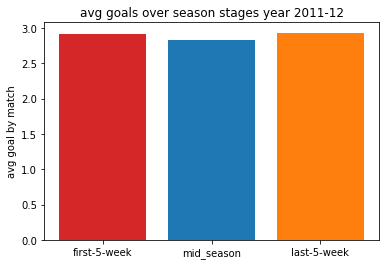

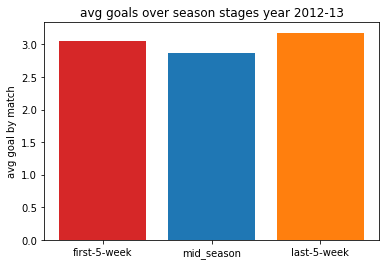

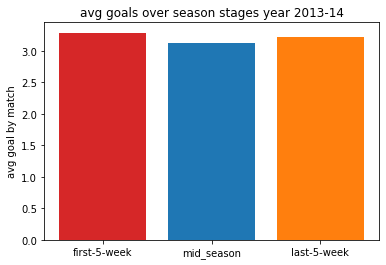

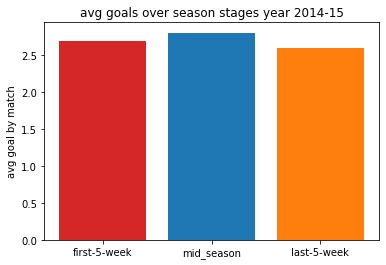

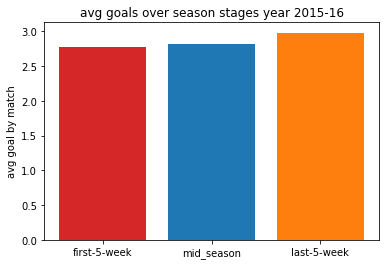

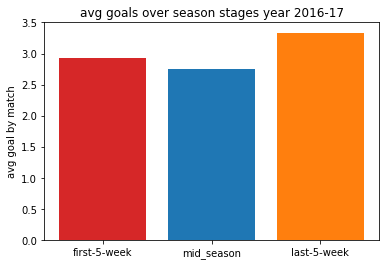

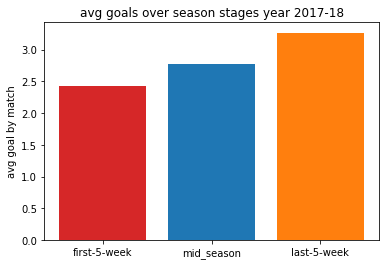

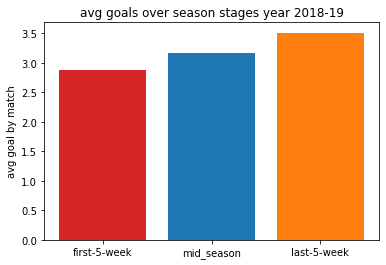

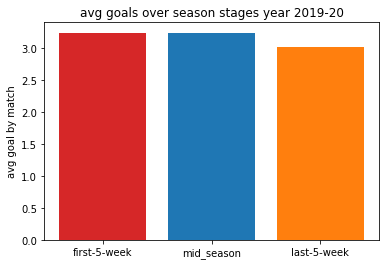

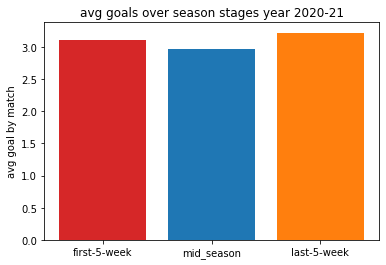

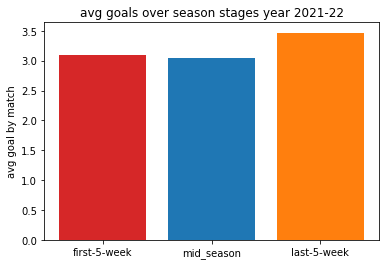

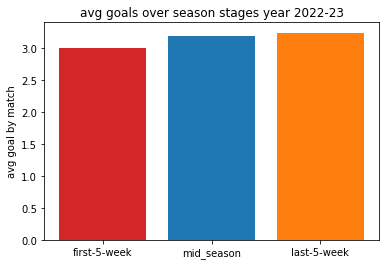

In [96]:
for i in range(len(bundesliga_df_list)):
    start_season_avg_goal=bundesliga_df_list[i].iloc[0:45,[3,4]].sum().sum()/45
    mid_season_avg_goal=bundesliga_df_list[i].iloc[45:261,[3,4]].sum().sum()/(306-90)
    end_season_avg_goal=bundesliga_df_list[i].iloc[261:306,[3,4]].sum().sum()/45

    fig, ax = plt.subplots()

    i=i+11
    stages=['first-5-week', 'mid_season', 'last-5-week']
    counts =[start_season_avg_goal,mid_season_avg_goal, end_season_avg_goal]
    bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

    ax.bar(stages, counts, color=bar_colors)

    ax.set_ylabel('avg goal by match')
    ax.set_title('avg goals over season stages year 20'+str(i)+'-'+str(i+1))

    plt.show()

In [5]:
def last_n_week_point_avg(df,team,n_week, current_week):
    df = df.loc[(df.HomeTeam==team)|(df.AwayTeam==team)]
    df.index=np.arange(1, len(df) + 1)
    points=0
    if current_week<n_week:
        print('The number of selected -N_WEEK- week cannot be greater than the current week.')
    for i in range(current_week-n_week,current_week):
        if df.HomeTeam[i]==team:
            if df.FTR[i]=='H':
                points=points+3
            elif df.FTR[i]=='D':
                points=points+1
            else:
                points=points+0
        elif df.AwayTeam[i]==team:
            if df.FTR[i]=='H':
                points=points+0
            elif df.FTR[i]=='D':
                points=points+1
            else:
                points=points+3
    print ('LAST '+str(n_week)+' WEEK AVARAGE POINTS PER MATCH BY "'+str(team)+'": '+str(points/n_week)+' points')
    return(points/n_week)
    
def last_n_week_avg_goal_diff(df,team,n_week, current_week):
    df = df.loc[(df.HomeTeam==team)|(df.AwayTeam==team)]
    df.index=np.arange(1, len(df) + 1)
    plus=0
    minus=0
    if current_week<n_week:
        print('The number of weeks selected cannot be greater than the current number of weeks.')
    for i in range(current_week-n_week,current_week):
        if df.HomeTeam[i]==team:
            plus+=df.FTHG[i]
            minus+=df.FTAG[i]
        elif df.AwayTeam[i]==team:
            plus+=df.FTAG[i]
            minus+=df.FTHG[i]
    goal=plus-minus
    print ('LAST '+str(n_week)+' WEEK AVARAGE GOAL DIFF PER MATCH BY "'+str(team)+'": '+str(goal/n_week)+' goals')
    return(goal/n_week)

def last_n_week_avg_goal(df,team,n_week, current_week):
    goal=last_n_week_avg_first_half_goal(df,team,n_week, current_week)+last_n_week_avg_second_half_goal(df,team,n_week, current_week)
    return(goal)

def last_n_week_avg_first_half_goal(df,team,n_week, current_week):
    df = df.loc[(df.HomeTeam==team)|(df.AwayTeam==team)]
    df.index=np.arange(1, len(df) + 1)
    goal=0
    if current_week<n_week:
        print('The number of weeks selected cannot be greater than the current number of weeks.')
    for i in range(current_week-n_week,current_week):
        if df.HomeTeam[i]==team:
            goal+=df.HTHG[i]
        elif df.AwayTeam[i]==team:
            goal+=df.HTAG[i]
    print ('LAST '+str(n_week)+' WEEK AVARAGE 1.HALFTIME GOALS PER MATCH BY "'+str(team)+'": '+str(goal/n_week)+' goals')
    return(goal/n_week)

def last_n_week_avg_second_half_goal(df,team,n_week, current_week):
    df = df.loc[(df.HomeTeam==team)|(df.AwayTeam==team)]
    df.index=np.arange(1, len(df) + 1)
    goal=0
    if current_week<n_week:
        print('The number of weeks selected cannot be greater than the current number of weeks.')
    for i in range(current_week-n_week,current_week):
        if df.HomeTeam[i]==team:
            goal+=(df.FTHG[i]-df.HTHG[i])
        elif df.AwayTeam[i]==team:
            goal+=(df.FTAG[i]-df.HTAG[i])
    print ('LAST '+str(n_week)+' WEEK AVARAGE 2.HALFTIME GOALS PER MATCH BY "'+str(team)+'": '+str(goal/n_week)+' goals')
    return(goal/n_week)

def last_n_week_avg_shot(df,team,n_week, current_week):
    df = df.loc[(df.HomeTeam==team)|(df.AwayTeam==team)]
    df.index=np.arange(1, len(df) + 1)
    shot=0
    if current_week<n_week:
        print('The number of weeks selected cannot be greater than the current number of weeks.')
    for i in range(current_week-n_week,current_week):
        if df.HomeTeam[i]==team:
            shot+=df.HS[i]
        elif df.AwayTeam[i]==team:
            shot+=df.AS[i]
    print ('LAST '+str(n_week)+' WEEK AVARAGE SHOTS PER MATCH BY "'+str(team)+'": '+str(shot/n_week)+' shots')
    return(shot/n_week)

def last_n_week_avg_shot_on_target(df,team,n_week, current_week):
    df = df.loc[(df.HomeTeam==team)|(df.AwayTeam==team)]
    df.index=np.arange(1, len(df) + 1)
    shot=0
    if current_week<n_week:
        print('The number of weeks selected cannot be greater than the current number of weeks.')
    for i in range(current_week-n_week,current_week):
        if df.HomeTeam[i]==team:
            shot+=df.HST[i]
        elif df.AwayTeam[i]==team:
            shot+=df.AST[i]
    print ('LAST '+str(n_week)+' WEEK AVARAGE SHOTS ON TARGET PER MATCH BY "'+str(team)+'": '+str(shot/n_week)+' shots')
    return(shot/n_week)

def last_n_week_avg_corner(df,team,n_week, current_week):
    df = df.loc[(df.HomeTeam==team)|(df.AwayTeam==team)]
    df.index=np.arange(1, len(df) + 1)
    corner=0
    if current_week<n_week:
        print('The number of weeks selected cannot be greater than the current number of weeks.')
    for i in range(current_week-n_week,current_week):
        if df.HomeTeam[i]==team:
            corner+=df.HC[i]
        elif df.AwayTeam[i]==team:
            corner+=df.AC[i]
    print ('LAST '+str(n_week)+' WEEK AVARAGE CORNER PER MATCH BY "'+str(team)+'": '+str(corner/n_week)+' CORNERS')
    return(corner/n_week)

def last_n_week_avg_foul_commited(df,team,n_week, current_week):
    df = df.loc[(df.HomeTeam==team)|(df.AwayTeam==team)]
    df.index=np.arange(1, len(df) + 1)
    foul=0
    if current_week<n_week:
        print('The number of weeks selected cannot be greater than the current number of weeks.')
    for i in range(current_week-n_week,current_week):
        if df.HomeTeam[i]==team:
            foul+=df.HF[i]
        elif df.AwayTeam[i]==team:
            foul+=df.AF[i]
    print('LAST '+str(n_week)+' WEEK AVARAGE FOULS COMMITED PER MATCH BY "'+str(team)+'": '+str(foul/n_week)+' FOULS')
    return(foul/n_week)
    
def last_n_week_avg_foul_recieved(df,team,n_week, current_week):
    df = df.loc[(df.HomeTeam==team)|(df.AwayTeam==team)]
    df.index=np.arange(1, len(df) + 1)
    foul=0
    if current_week<n_week:
        print('The number of weeks selected cannot be greater than the current number of weeks.')
    for i in range(current_week-n_week,current_week):
        if df.HomeTeam[i]==team:
            foul+=df.AF[i]
        elif df.AwayTeam[i]==team:
            foul+=df.HF[i]
    print('LAST '+str(n_week)+' WEEK AVARAGE FOULS RECIEVED PER MATCH BY "'+str(team)+'": '+str(foul/n_week)+' FOULS')
    return(foul/n_week)

def last_n_week_avg_foul_diff(df,team,n_week, current_week):
    diff=last_n_week_avg_foul_commited(df,team,n_week, current_week)-last_n_week_avg_foul_recieved(df,team,n_week, current_week)
    if diff>0:
        print('More fouls commited than recieved(aggressive) : - '+ str(diff))
        return(-diff)
    else:
        print('Less fouls commited than recieved(non-aggressive) : + '+ str(diff))
        return(diff)
    
def last_n_week_avg_booking_points(df,team,n_week, current_week):
    df = df.loc[(df.HomeTeam==team)|(df.AwayTeam==team)]
    df.index=np.arange(1, len(df) + 1)
    yellow=0
    red=0
    point=0
    if current_week<n_week:
        print('The number of weeks selected cannot be greater than the current number of weeks.')
    for i in range(current_week-n_week,current_week):
        if df.HomeTeam[i]==team:
            yellow+=df.HY[i]
            red+=df.HR[i]
        elif df.AwayTeam[i]==team:
            yellow+=df.AY[i]
            red+=df.AR[i]
    point=(10*yellow)+(25*red)
    print('LAST '+str(n_week)+' WEEK AVARAGE BOOKING POINTS PER MATCH BY "'+str(team)+'": '+str(point/n_week)+' BOOKING POINTS')
    return(point/n_week)
    

